In [45]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from utils import utils
from utils import dbm_math

In [46]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
data1 = utils.read_mat("/home/matthias/WS_all/dbm/raw/ex3_handout/ex3_system1_data.mat")
data2 = utils.read_mat("/home/matthias/WS_all/dbm/raw/ex3_handout/ex3_system2_data.mat")

display(data1.keys())
display(data2.keys())

dict_keys(['None', 'README', 't1', 't2', 'u1', 'u2', 'y1', 'y2'])

dict_keys(['README', 't1', 't2', 't3', 'u1', 'u2', 'u3', 'y1', 'y2', 'y3'])

In [48]:
# Constant3
NA = 6
NB = 4

HA_NUM = 6

def func(x,p):
    return x ** p

HA_FUN = func

In [49]:
# Data
t = jnp.array(data2.t1)
y = jnp.array(data2.y1)
u = jnp.array(data2.u1)
Ts = t[1] - t[0]


In [50]:
p_hat = dbm_math.hammerstein_parameter_vector(y,u,t,NA,NB, HA_NUM, HA_FUN)

In [ ]:
p_hat,loss, func, order, na,nb = dbm_math.hammerstein_optimization(y,u,,(2,7),(1,3),(-1,1))

Function 1/85
Seconds left: 0.00022292137145996094
Function 2/85
Seconds left: 203.20029830932617
Function 3/85
Seconds left: 197.40885961055756
Function 4/85
Seconds left: 190.67974483966827
Function 5/85
Seconds left: 186.73638966679573
Function 6/85
Seconds left: 184.48004841804504
Function 7/85
Seconds left: 183.30937331169844
Function 8/85
Seconds left: 182.6042526885867
Function 9/85
Seconds left: 181.34193069674075
Function 10/85
Seconds left: 177.39401457831264


KeyboardInterrupt: 

In [ ]:
print("Loss", loss)
print("Func", func)
print("Order", order)
y_pred = dbm_math.hammerstein_sim(y[:NA], u, NA, NB, order, func, p_hat)

Loss 0.16714741
Func functools.partial(<function hammerstein_optimization.<locals>.func at 0x791e5f0d53a0>, q=Array(-0.08333328, dtype=float32))
Order 3


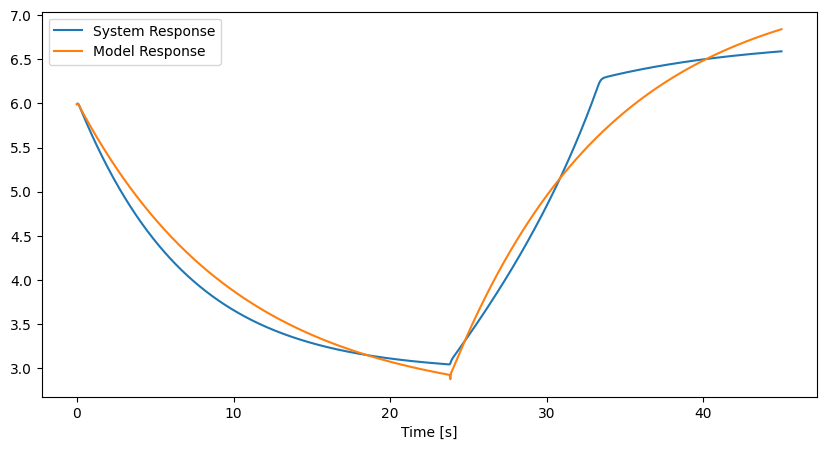

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t,y, label="System Response")
plt.xlabel("Time [s]")
plt.plot(t, y_pred,label="Model Response")
plt.legend()
plt.show()
